# Image Segmentation
        - partitions a image into regions having similar visual appearances corresponding parts of to objects.

In [235]:
import numpy as np
import matplotlib.pyplot as plt

#### Dominant color extraction 
        -we will use kmeans to extract the most dominant k colors.

In [236]:
import cv2

In [264]:
img = cv2.imread("hulk.jpg")                        #BGR format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                #RGB format
print(img.shape)

(720, 1280, 3)


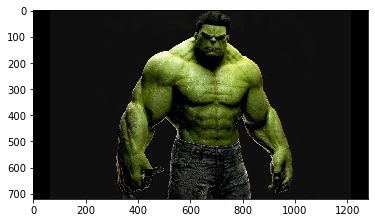

In [265]:
plt.imshow(img)
plt.show()

In [266]:
#flatten the image in a linear array
pixels = img.reshape((-1,3))
print(pixels.shape)

(921600, 3)


In [267]:
from sklearn.cluster import KMeans

In [268]:
dominant_colors = 2
km = KMeans(n_clusters= dominant_colors)

In [269]:
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [270]:
centers = km.cluster_centers_
print(centers)

[[ 16.86032125  18.05379328  12.96714305]
 [130.73654692 146.01828609  69.9478017 ]]


In [271]:
labels = km.labels_
print(km.labels_)

[0 0 0 ... 0 0 0]


In [272]:
centers = np.array(centers,dtype = "uint8")
print(centers)

[[ 16  18  12]
 [130 146  69]]


###### Plot the extracted colors.

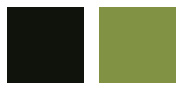

In [273]:
i=1

colors = []

plt.figure(0,figsize=(3,2))
for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3),dtype = "uint8")
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

## Segmenting our Original image

In [274]:
new_img = np.zeros((pixels.shape),dtype = "uint8")
print(new_img.shape)
print(colors)

(921600, 3)
[array([16, 18, 12], dtype=uint8), array([130, 146,  69], dtype=uint8)]


In [275]:
#assign each pixel to one of the extracted colors according to the labels generated

for i in range(new_img.shape[0]):
    new_img[i] = colors[labels[i]]

#reshape new img to its original size.
new_img = new_img.reshape(img.shape)
print(new_img.shape)

(720, 1280, 3)


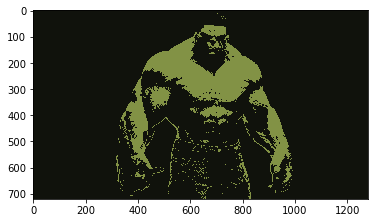

In [276]:
plt.imshow(new_img)
plt.show()